# TUTORIAL PCA: Feature selection and dimensionality reduction
AIMS: Introduce Principal component analysis for feature selection and data dimensionality
reduction
Tasks:
pass through the notebook https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb

# In Depth: Principal Component Analysis

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data. Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:


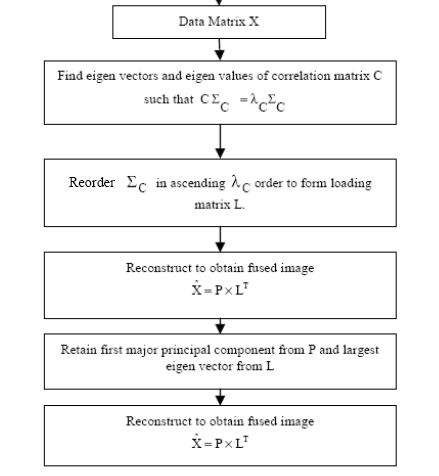

Credits: https://www.researchgate.net/figure/Flowchart-of-PCA-Method-23-IMPLEMENTATION-OF-PROPOSED-TECHNIQUE-231-PRINCIPAL_fig2_308982196

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in Introducing Scikit-Learn. Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 points:

Text(0.5, 1.0, 'Plot of random numbers that are somewhat correlated')

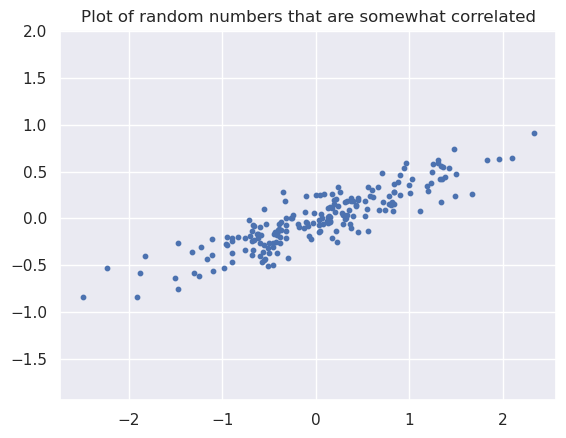

In [2]:
rng = np.random.RandomState(1)       #random number generator with a fixed seed =1
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1],s=10)
plt.axis('equal')
plt.title('Plot of random numbers that are somewhat correlated')

# This creates a 2 x 2 array of random values between 0 and 1 (rng.rand(2, 2)) 
# and 
# a 2 x 200 array of normally distributed random values(mean 0 and standard deviation 1) (rng.randn(2, 200)). 
# The two arrays are multiplied using dot product (np.dot) to obtain a 2 x 200 array. 
# Finally, the transpose (T) of the resulting array is taken to obtain a 200 x 2 array.

# Dataset with 200 data points in 2-dimensional space.

# Since the dot product is a linear transformation, it introduces a linear relationship between the 
# two dimensions of the generated data. This results in a slight correlation between the x-coordinates and 
# y-coordinates of the data points.

In [3]:
X[:, 0]

array([-6.25301618e-01,  9.60695033e-01, -5.98543385e-01, -2.22805938e+00,
       -4.61430060e-01, -9.58929028e-01, -6.73079909e-01,  1.30501861e+00,
        3.74545597e-01, -1.82628627e+00,  6.68262284e-01, -5.82646676e-01,
       -4.18128976e-01,  1.72209371e-01,  3.77116687e-01, -6.79396230e-01,
        1.03148960e+00,  3.36041799e-01,  7.05745985e-01,  8.39511547e-01,
        1.49882898e+00,  2.88356638e-01, -5.02935011e-01,  1.47921067e+00,
       -4.44382429e-01, -5.33464228e-01, -6.16229422e-01,  7.46598965e-02,
       -1.13637011e-01, -2.00717298e-02,  1.89582967e-01,  9.38466103e-01,
       -3.66697989e-01, -8.93528486e-01, -1.31759571e+00, -3.81802782e-01,
       -5.13790216e-01,  9.03737934e-01, -4.38875079e-01, -5.94170907e-01,
       -3.12943931e-01, -3.00229089e-01, -5.99239320e-01,  2.20370036e-01,
        5.25164844e-01,  5.56625011e-01,  1.35428157e+00, -6.83159806e-01,
       -1.23325109e-01, -3.13175458e-01, -2.48838277e+00,  1.24996586e+00,
        1.76764431e-01, -



By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  #Reduce dimensionality to 2
pca.fit(X)    #fits the PCA model to the data and computes the principal components

#It computes the principal components by analyzing the data's covariance matrix. 
# The PCA model will learn the transformation that captures the most significant patterns and structures 
# in the data.

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [5]:
print(pca.components_) #access the principal components

#access the principal components using pca.components_, 
# which will be a 2-dimensional array where each row represents a principal component.

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

#'explained_variance_ attribute returns the amount of variance explained by each principal component, 
# without normalization. It is a measure of the absolute contribution of each principal component to the 
# total variance in the data.'

[0.7625315 0.0184779]


In [7]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

#shows how much variance is explained by each principal component.
#This information is useful for understanding how much information is retained by each principal component 
# and deciding how many principal components to keep.

Explained variance ratio: [0.97634101 0.02365899]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

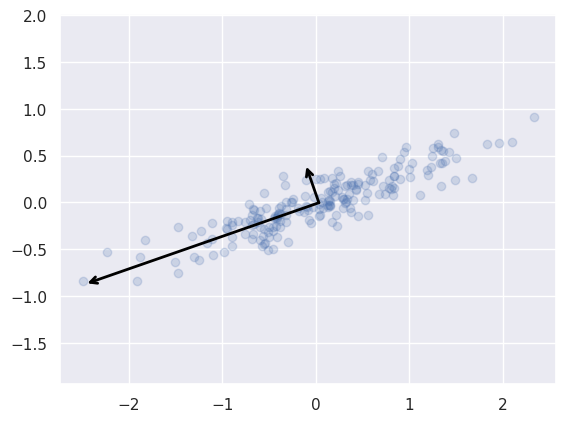

In [8]:
def draw_vector(v0, v1, ax=None): #Two input vectors where first one is the starting point of the vector and other is the endpoint
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black') #Added the colour argument because the vectors weren't visible
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

#The function plots the principal components as vectors
#length = variance
#vector = pca components
#The choice of multiplying the sq root of variance to 3 is a little arbitrary but the point is to make 
# the vectors visible while preservinag the magnitude scales



These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:


In [9]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)   #whitening the transformed data
pca.fit(X)

# Whitening is a preprocessing technique that transforms the data to have zero mean and unit variance, 
# and decorrelates the features so that the covariance matrix is the identity matrix and ensures that 
# they contribute equally to the variance of the data.

PCA(n_components=2, whiten=True)

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

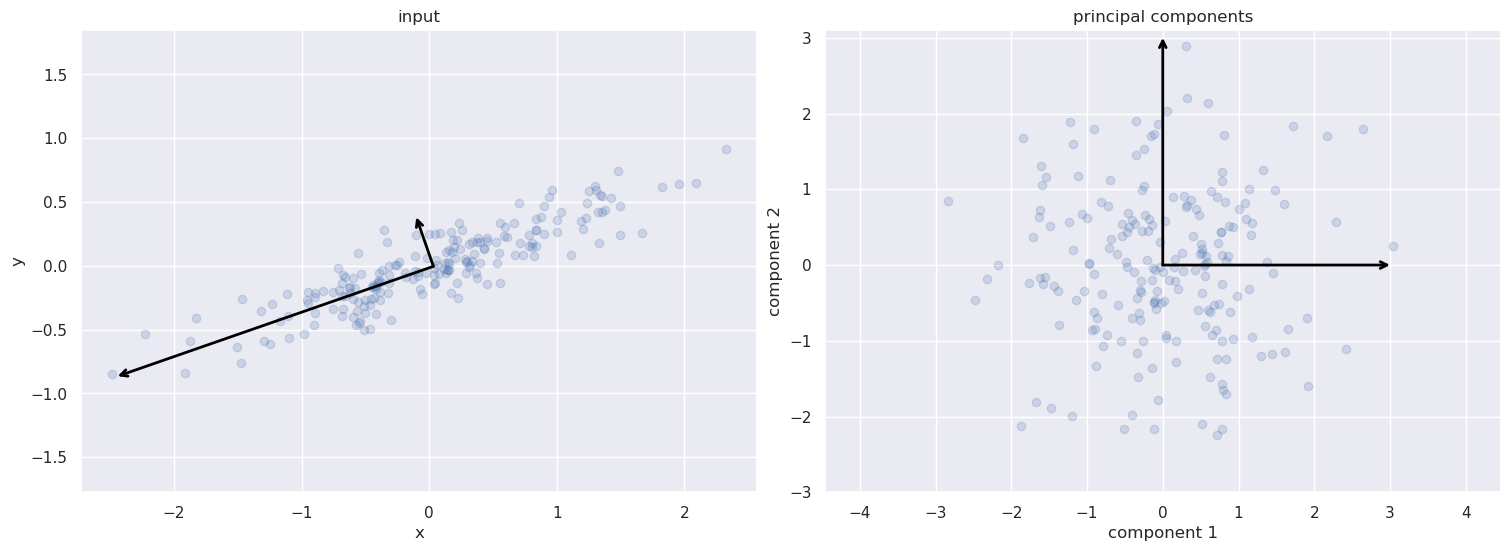

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))



This transformation from data axes to principal axes is an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.


# PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [11]:
pca = PCA(n_components=1) #Reducing the dimension to 1
pca.fit(X)              # Fitting it to data X
X_pca = pca.transform(X)   # This applies the learned PCA transformation to the input data X, returning a new array X_pca with the same number of rows as X but only 1 column.
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389316,
 1.006064230853995)

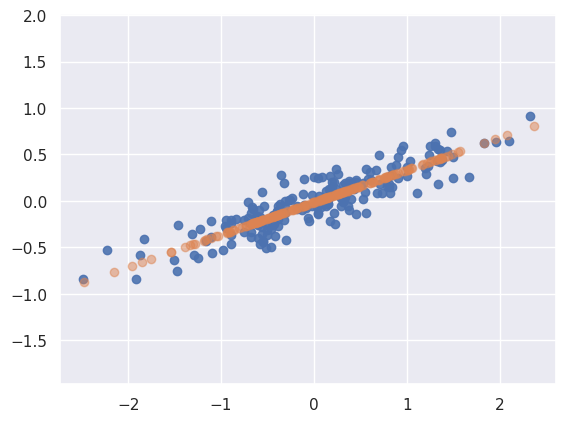

In [12]:
X_new = pca.inverse_transform(X_pca)  #reconstruct the original data from the transformed data
plt.scatter(X[:, 0], X[:, 1], alpha=0.9)  #Plots original data
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.5) #Plots reconstructed data
plt.axis('equal')



The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.


# PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. To see this, let's take a quick look at the application of PCA to the digits data we saw in In-Depth: Decision Trees and Random Forests.

We start by loading the data:

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

#each images has 64 pixels arranged in an array side by side ( pixel 1, pixel 2, pixel 3,....pixel 64)
# (8x8 image grid)
#there are 1797 such images

(1797, 64)

In [14]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [15]:
len(digits.data) #Number of images

1797

In [16]:
digits.data[0]  #First image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
len(digits.data[0])

64

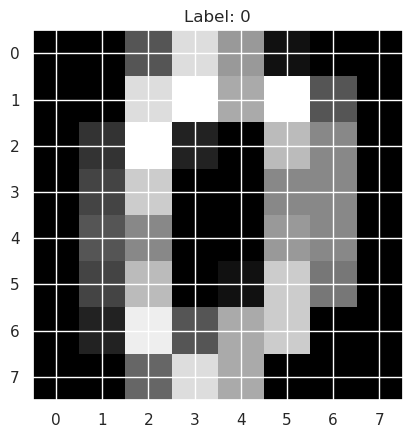

In [18]:
#Recreating the 1st image

# Get the pixel values and label of the selected image
image_pixels = digits.data[0]
image_label = digits.target[0]

# Reshape the pixel values into a 2D array of shape (8, 8)
image_pixels = image_pixels.reshape((8, 8))

# Visualize the image
plt.imshow(image_pixels, cmap='gray')
plt.title(f"Label: {image_label}")
plt.show()

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [19]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [20]:
pca.explained_variance_

array([179.0069301 , 163.71774688])

In [21]:
 pca.mean_

array([0.00000000e+00, 3.03839733e-01, 5.20478575e+00, 1.18358375e+01,
       1.18480801e+01, 5.78185865e+00, 1.36227045e+00, 1.29660545e-01,
       5.56483027e-03, 1.99387869e+00, 1.03823038e+01, 1.19794101e+01,
       1.02793545e+01, 8.17584864e+00, 1.84641068e+00, 1.07957707e-01,
       2.78241514e-03, 2.60155815e+00, 9.90317195e+00, 6.99276572e+00,
       7.09794101e+00, 7.80634391e+00, 1.78853645e+00, 5.00834725e-02,
       1.11296605e-03, 2.46967168e+00, 9.09126322e+00, 8.82136895e+00,
       9.92710072e+00, 7.55147468e+00, 2.31775181e+00, 2.22593211e-03,
       0.00000000e+00, 2.33945465e+00, 7.66722315e+00, 9.07178631e+00,
       1.03016138e+01, 8.74401781e+00, 2.90929327e+00, 0.00000000e+00,
       8.90372844e-03, 1.58375070e+00, 6.88146912e+00, 7.22815804e+00,
       7.67223150e+00, 8.23650529e+00, 3.45631608e+00, 2.72676683e-02,
       7.23427935e-03, 7.04507513e-01, 7.50695604e+00, 9.53923205e+00,
       9.41624930e+00, 8.75848637e+00, 3.72509738e+00, 2.06455203e-01,
      

/tmp/ipykernel_42390/2943749715.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


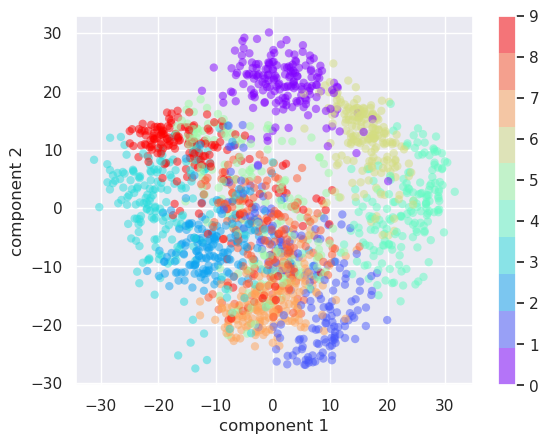

In [22]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

# I also did a 3D projection using 3 PCA components

In [23]:
pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 3)


In [24]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter3d(
    x=projected[:, 0],  # x-axis values from the first projected component
    y=projected[:, 1],  # y-axis values from the second projected component
    z=projected[:, 2],  # z-axis values from the third projected component
    mode='markers',
    marker=dict(
        size=5,
        color=digits.target,
        colorscale='Rainbow',
        opacity=0.5
    )
))

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

In [25]:
pca.mean_

array([0.00000000e+00, 3.03839733e-01, 5.20478575e+00, 1.18358375e+01,
       1.18480801e+01, 5.78185865e+00, 1.36227045e+00, 1.29660545e-01,
       5.56483027e-03, 1.99387869e+00, 1.03823038e+01, 1.19794101e+01,
       1.02793545e+01, 8.17584864e+00, 1.84641068e+00, 1.07957707e-01,
       2.78241514e-03, 2.60155815e+00, 9.90317195e+00, 6.99276572e+00,
       7.09794101e+00, 7.80634391e+00, 1.78853645e+00, 5.00834725e-02,
       1.11296605e-03, 2.46967168e+00, 9.09126322e+00, 8.82136895e+00,
       9.92710072e+00, 7.55147468e+00, 2.31775181e+00, 2.22593211e-03,
       0.00000000e+00, 2.33945465e+00, 7.66722315e+00, 9.07178631e+00,
       1.03016138e+01, 8.74401781e+00, 2.90929327e+00, 0.00000000e+00,
       8.90372844e-03, 1.58375070e+00, 6.88146912e+00, 7.22815804e+00,
       7.67223150e+00, 8.23650529e+00, 3.45631608e+00, 2.72676683e-02,
       7.23427935e-03, 7.04507513e-01, 7.50695604e+00, 9.53923205e+00,
       9.41624930e+00, 8.75848637e+00, 3.72509738e+00, 2.06455203e-01,
      

In [26]:
#Tried plotting the PCA componets as vectors but they are too small

import plotly.graph_objects as go
import numpy as np

# Plot the scatter points
fig = go.Figure(data=go.Scatter3d(
    x=projected[:, 0],  # x-axis values from the first projected component
    y=projected[:, 1],  # y-axis values from the second projected component
    z=projected[:, 2],  # z-axis values from the third projected component
    mode='markers',
    marker=dict(
        size=5,
        color=digits.target,
        colorscale='Rainbow',
        opacity=0.5
    )
))

# Add PCA components as vectors
for i in range(3):
    eigen_vector = pca.components_[i]  # Get the eigenvector for the corresponding component
    v = eigen_vector * 4  # Scale the vector length for better visualization
    mean_point = pca.mean_[:3]  # Coordinates of the mean point (modify indexing if necessary)
    fig.add_trace(go.Cone(
        x=[mean_point[0]], y=[mean_point[1]], z=[mean_point[2]],
        u=[v[0]], v=[v[1]], w=[v[2]],
        sizemode='absolute', sizeref=1,
        colorscale='Greys', showscale=False
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()


# What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector x:

x=[x1,x2,x3⋯x64]

One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

image(x)=x1⋅(pixel 1)+x2⋅(pixel 2)+x3⋅(pixel 3)⋯x64⋅(pixel 64)

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

In [27]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

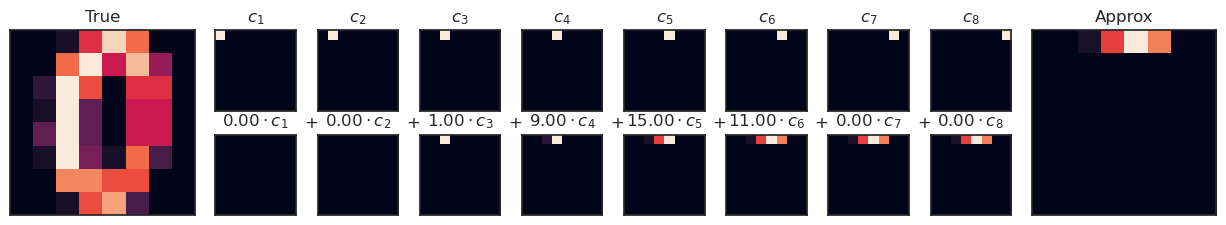

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

#fig.savefig('figures/05.09-digits-pixel-components.png')



The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image. Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image. Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

image(x)=mean+x1⋅(basis 1)+x2⋅(basis 2)+x3⋅(basis 3)⋯

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series. This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:


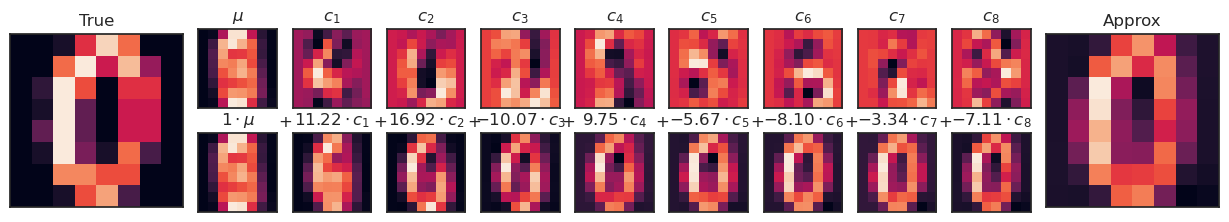

In [29]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

#fig.savefig('figures/05.09-digits-pca-components.png')


Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.
    
# Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

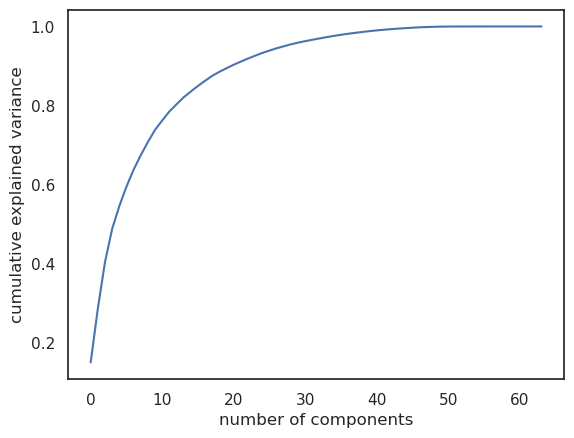

In [30]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

# PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

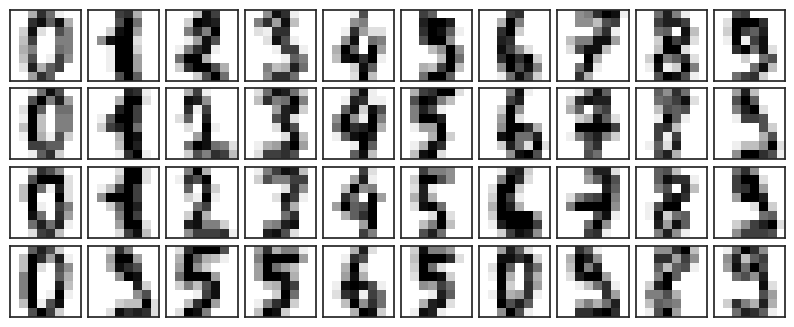

In [31]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

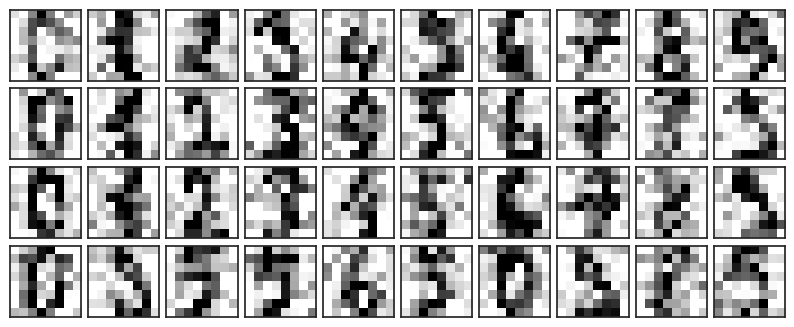

In [32]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

#generates noisy versions of the digits dataset and then plots the noisy digits.

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [33]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

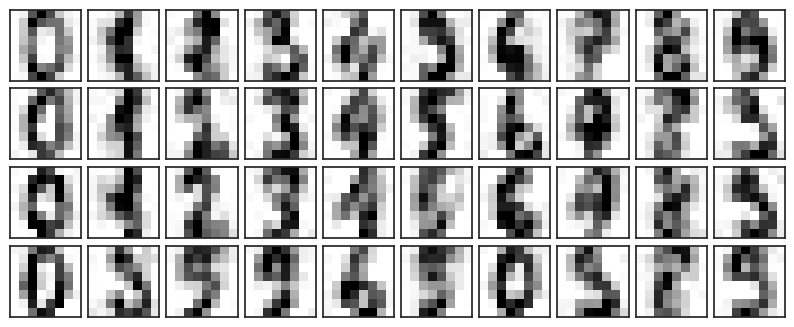

In [34]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

#This process reconstructs the data by projecting it onto the principal components and 
# then reconstructing it using the inverse transformation.

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

# Example: Eigenfaces

Earlier we explored an example of using a PCA projection as a feature selector for facial recognition with a support vector machine (see In-Depth: Support Vector Machines). Here we will take a look back and explore a bit more of what went into that. Recall that we were using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [35]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)


#fetch the Labeled Faces in the Wild (LFW) dataset, specifically the subset of the dataset that 
# contains faces of people with a minimum number of images per person.
# The LFW dataset is a popular benchmark dataset used for face recognition tasks. 
# It contains grayscale images of faces collected from the internet, with each image labeled with the 
# corresponding person's name.

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). We will take a look at the first 150 components:

In [36]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

In [37]:
pca.components_

array([[-0.00781674, -0.00832545, -0.00889869, ..., -0.01380171,
        -0.0124732 , -0.01100373],
       [ 0.01708266,  0.01612974,  0.01589651, ..., -0.03532809,
        -0.03474604, -0.03335211],
       [-0.02085461, -0.01923331, -0.01841202, ..., -0.03721154,
        -0.03306305, -0.0306595 ],
       ...,
       [-0.00114175, -0.00851078, -0.02256203, ...,  0.00029081,
        -0.02626782, -0.01455084],
       [-0.02865541, -0.01146644,  0.00195693, ...,  0.0271749 ,
         0.0105318 , -0.02079272],
       [ 0.00747171,  0.00356055,  0.01221979, ...,  0.07261699,
         0.04426974, -0.00784376]], dtype=float32)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). As you can see in this figure, they are as creepy as they sound:

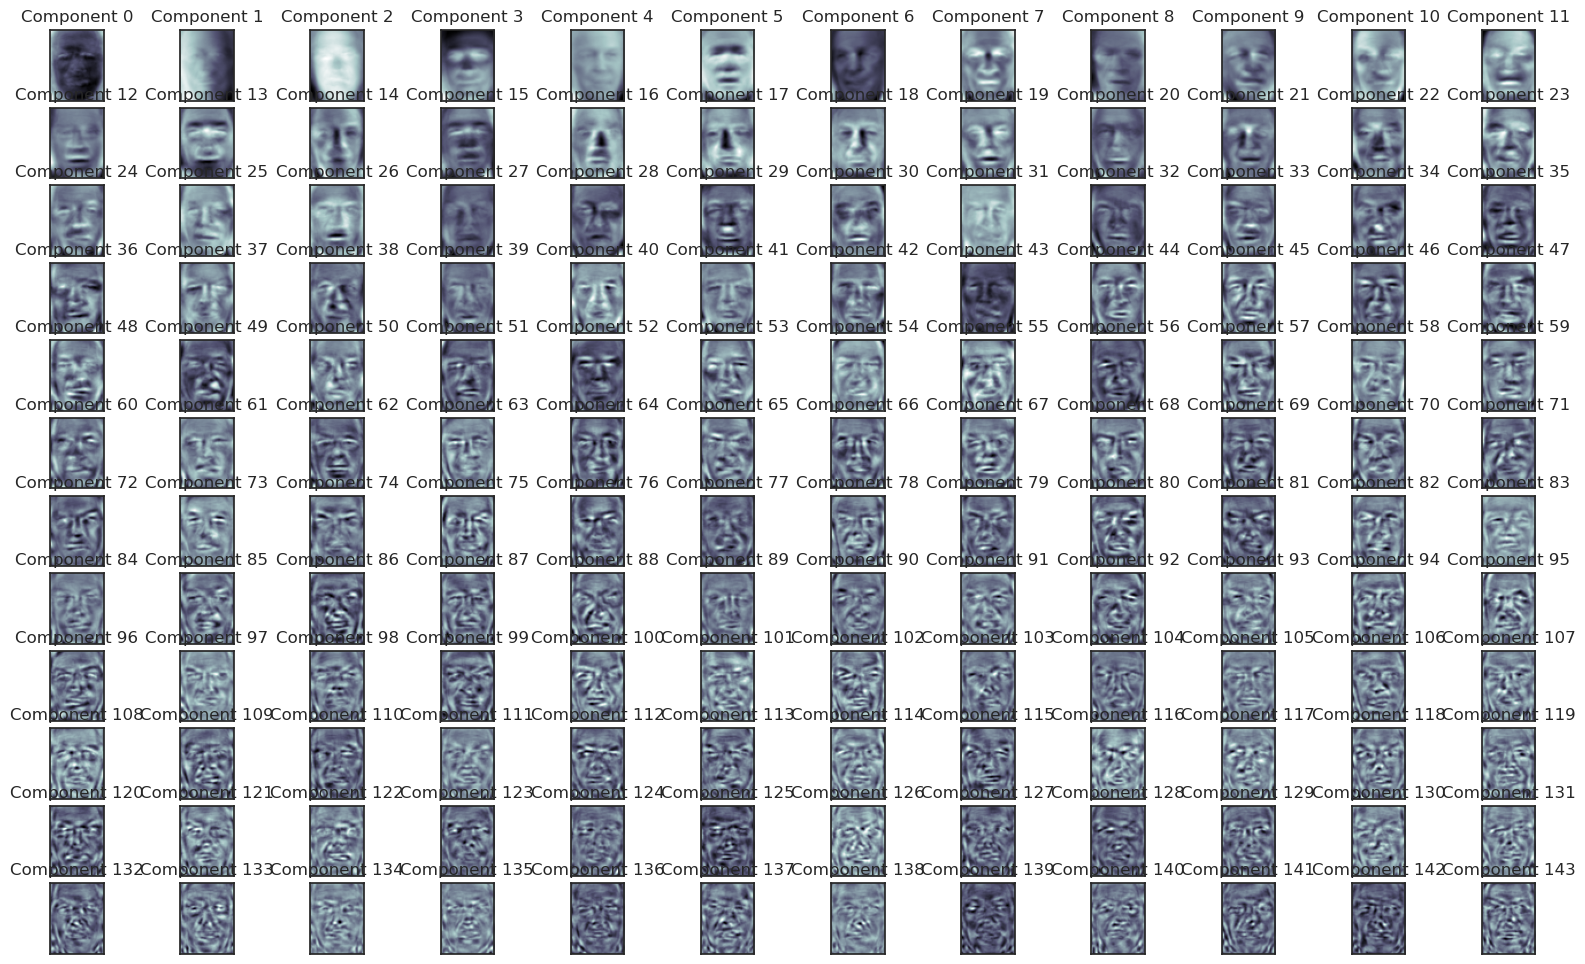

In [38]:
fig, axes = plt.subplots(12,12, figsize=(20, 12),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    ax.set_title(f'Component {i}') # Added to show which componets are shown in each row of the images
    

plt.show()


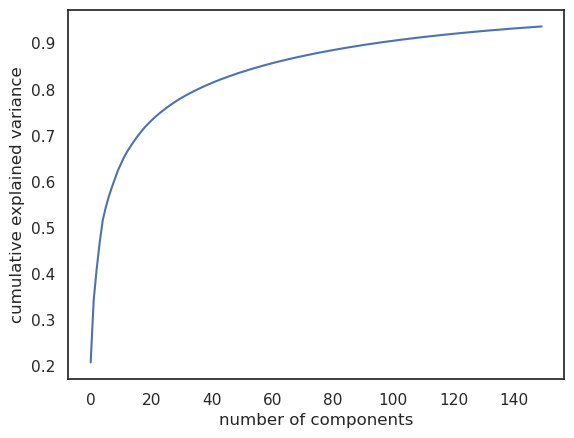

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [40]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data) #fits the RandomizedPCA model to the input data
# The fit method analyzes the data and determines the transformation required to reduce its 
# dimensionality while preserving the most important information.
components = pca.transform(faces.data) #The transform method returns the transformed data, where each data 
# point is represented in the reduced-dimensional space defined by the principal components.
projected = pca.inverse_transform(components)
# This line performs the inverse transformation to reconstruct the projected faces from the reduced-dimensional 
# space. It maps the transformed data components back to the original data space using the inverse 
# transformation of the dimensionality reduction. The inverse_transform method reconstructs the original data 
# using the principal components and returns the projected faces.

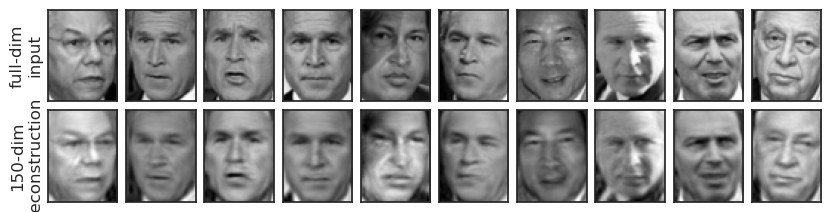

In [41]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio). Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. RandomizedPCA, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term (see In Depth: Linear Regression) that serves to enforce sparsity of the components.

In the following sections, we will look at other unsupervised learning methods that build on some of the ideas of PCA.


# My example using exoplanet data

 Data taken from https://www.kaggle.com/datasets/shivamb/all-exoplanets-dataset

In the code below I have taken an exoplanet data set and attempted dimension reduction. 
I then tried clustering the data based on the reduced data. 
This can be useful when I have new test data where grouping them based on their characteristics can help us identify different types of exoplanets. 
Here, however, my data set is small and the clustering algorithm doesn't create cluster the data points properly. 

In [42]:
import pandas as pd
data=pd.read_csv('/home/sagarika/belgrade/astrobio/all_exoplanets_2021.csv')
data

No. Planet Name Planet Host  Num Stars  Num Planets Discovery Method  \
0        1    11 Com b      11 Com          2            1  Radial Velocity   
1        2    11 UMi b      11 UMi          1            1  Radial Velocity   
2        3    14 And b      14 And          1            1  Radial Velocity   
3        4    14 Her b      14 Her          1            2  Radial Velocity   
4        5  16 Cyg B b    16 Cyg B          3            1  Radial Velocity   
...    ...         ...         ...        ...          ...              ...   
4570  4571   tau Gem b     tau Gem          1            1  Radial Velocity   
4571  4572   ups And b     ups And          2            3  Radial Velocity   
4572  4573   ups And c     ups And          2            3  Radial Velocity   
4573  4574   ups And d     ups And          2            3  Radial Velocity   
4574  4575    xi Aql b      xi Aql          1            1  Radial Velocity   

      Discovery Year                      Discovery Facility  \
0               2007                        Xinglong Station   
1               2009  Thueringer Landessternwarte Tautenburg   
2               2008       Okayama Astrophysical Observatory   
3               2002                  W. M. Keck Observatory   
4               1996                  Multiple Observatories   
...              ...                                     ...   
4570            2013                        Lick Observatory   
4571            1996                        Lick Observatory   
4572            1999                  Multiple Observatories   
4573            1999                  Multiple Observatories   
4574            2007       Okayama Astrophysical Observatory   

      Orbital Period Days  Orbit Semi-Major Axis  ...  \
0              326.030000               1.290000  ...   
1              516.219970               1.530000  ...   
2              185.840000               0.830000  ...   
3             1773.400020               2.930000  ...   
4              798.500000               1.660000  ...   
...                   ...                    ...  ...   
4570           305.500000               1.170000  ...   
4571             4.617033               0.059222  ...   
4572           241.258000               0.827774  ...   
4573          1276.460000               2.513290  ...   
4574           136.750000               0.680000  ...   

      Equilibrium Temperature  Spectral Type  Stellar Effective Temperature  \
0                         NaN         G8 III                         4742.0   
1                         NaN            NaN                         4213.0   
2                         NaN         K0 III                         4813.0   
3                         NaN            NaN                         5338.0   
4                         NaN            NaN                         5750.0   
...                       ...            ...                            ...   
4570                      NaN         K2 III                         4388.0   
4571                      NaN           F8 V                            NaN   
4572                      NaN           F8 V                            NaN   
4573                      NaN           F8 V                            NaN   
4574                      NaN            NaN                         4780.0   

      Stellar Radius Stellar Mass  Stellar Metallicity  \
0              19.00         2.70               -0.350   
1              29.79         2.78               -0.020   
2              11.00         2.20               -0.240   
3               0.93         0.90                0.410   
4               1.13         1.08                0.060   
...              ...          ...                  ...   
4570           26.80         2.30                0.140   
4571            1.56         1.30                  NaN   
4572            1.56         1.30                  NaN   
4573            1.56         1.30                  NaN   
4574           12

In [43]:
data = data.drop(['No.', 'Planet Name','Planet Host','Discovery Method','Discovery Year','Discovery Facility',
                  'Equilibrium Temperature','Spectral Type','Stellar Metallicity Ratio'], axis=1)
data

Num Stars  Num Planets  Orbital Period Days  Orbit Semi-Major Axis  \
0             2            1           326.030000               1.290000   
1             1            1           516.219970               1.530000   
2             1            1           185.840000               0.830000   
3             1            2          1773.400020               2.930000   
4             3            1           798.500000               1.660000   
...         ...          ...                  ...                    ...   
4570          1            1           305.500000               1.170000   
4571          2            3             4.617033               0.059222   
4572          2            3           241.258000               0.827774   
4573          2            3          1276.460000               2.513290   
4574          1            1           136.750000               0.680000   

           Mass  Eccentricity  Insolation Flux  Stellar Effective Temperature  \
0     6165.6000        0.2310              NaN                         4742.0   
1     4684.8142        0.0800              NaN                         4213.0   
2     1525.5000        0.0000              NaN                         4813.0   
3     1481.0878        0.3700              NaN                         5338.0   
4      565.7374        0.6800              NaN                         5750.0   
...         ...           ...              ...                            ...   
4570  6547.0000        0.0310              NaN                         4388.0   
4571   218.5310        0.0215              NaN                            NaN   
4572   629.5950        0.2596              NaN                            NaN   
4573  1313.2200        0.2987              NaN                            NaN   
4574   890.0000        0.0000              NaN                         4780.0   

      Stellar Radius  Stellar Mass  Stellar Metallicity  \
0              19.00          2.70               -0.350   
1              29.79          2.78               -0.020   
2              11.00          2.20               -0.240   
3               0.93          0.90                0.410   
4               1.13          1.08                0.060   
...              ...           ...                  ...   
4570           26.80          2.30                0.140   
4571            1.56          1.30                  NaN   
4572            1.56          1.30                  NaN   
4573            1.56          1.30                  NaN   
4574           12.00          2.20               -0.205   

      Stellar Surface Gravity  Distance  Gaia Magnitude  
0                        2.31   93.1846         4.44038  
1                        1.93  125.3210         4.56216  
2                        2.63   75.4392         4.91781  
3                        4.45   17.9323         6.38300  
4                        4.36   21.1397         6.06428  
...                       ...       ...             ...  
4570                     1.96  112.5370         4.03996  
4571                      NaN   13.4054         3.98687  
4572                      NaN   13.4054         3.98687  
4573                      NaN   13.4054         3.98687  
4574                     2.66   56.1858         4.42501  

[4575 rows x 14 columns]

In [44]:
data = data.dropna()

In [45]:
len(data)

159

In [46]:
#Normalize the data
exoplanets = (data - data.mean()) / data.std()

In [47]:
exoplanets

Num Stars  Num Planets  Orbital Period Days  Orbit Semi-Major Axis  \
159   -0.405069    -0.581403             7.249106               6.081781   
160   -0.405069     1.196348            -0.225987              -0.284547   
161   -0.405069     1.196348            -0.201328              -0.165885   
162   -0.405069     1.196348            -0.160076              -0.037214   
175   -0.405069    -0.581403            -0.230118              -0.330440   
...         ...          ...                  ...                    ...   
4398  -0.405069    -0.581403            -0.222198              -0.260100   
4533  -0.405069    -0.581403            -0.227486              -0.288536   
4561  -0.405069     0.307473            -0.220508              -0.253967   
4563  -0.405069     0.307473            -0.151674              -0.037786   
4564  -0.405069     0.307473            -0.023151               0.237712   

          Mass  Eccentricity  Insolation Flux  Stellar Effective Temperature  \
159   4.327088     -0.682916        -0.231640                      -0.395858   
160  -0.449745     -0.244306         0.049878                       0.127514   
161  -0.442886     -0.171205        -0.188248                       0.127514   
162  -0.448088      0.413608        -0.217301                       0.127514   
175  -0.450417     -0.222376        -0.225990                      -2.017130   
...        ...           ...              ...                            ...   
4398 -0.422691     -0.682916        -0.112221                       0.737458   
4533 -0.198808     -0.405130         0.186454                       0.934215   
4561 -0.454298     -0.682916        -0.147791                       0.724669   
4563 -0.075121     -0.410247        -0.222270                       0.321319   
4564 -0.430918     -0.302788        -0.229017                       0.321319   

      Stellar Radius  Stellar Mass  Stellar Metallicity  \
159         3.313937     -0.149632            -1.531458   
160         1.297911      0.299829             0.686039   
161         1.297911      0.299829             0.686039   
162         1.297911      0.299829             0.686039   
175        -1.756675     -2.307044             1.150167   
...              ...           ...                  ...   
4398        0.300079      0.719326             0.634470   
4533        0.829541      1.378535             1.882457   
4561        0.055713      0.419685             0.067203   
4563        0.585174     -0.179596            -1.944016   
4564        0.585174     -0.179596            -1.944016   

      Stellar Surface Gravity  Distance  Gaia Magnitude  
159                 -3.343318  0.622570        0.481153  
160                 -1.576622  0.094523        0.169515  
161                 -1.576622  0.094523        0.169515  
162                 -1.576622  0.094523        0.169515  
175                  2.332663 -0.607707        0.819655  
...                       ...       ...             ...  
4398                -0.260997 -0.379785       -0.698241  
4533                -0.599301 -0.105042       -0.212558  
4561                 0.039717 -0.599400       -2.213021  
4563                -1.087961 -0.601239       -2.322712  
4564                -1.087961 -0.601239       -2.322712  

[159 rows x 14 columns]

In [48]:
exoplanets.shape

(159, 14)

In [49]:
# So I have 14 dimensional data

Text(0, 0.5, 'cumulative explained variance')

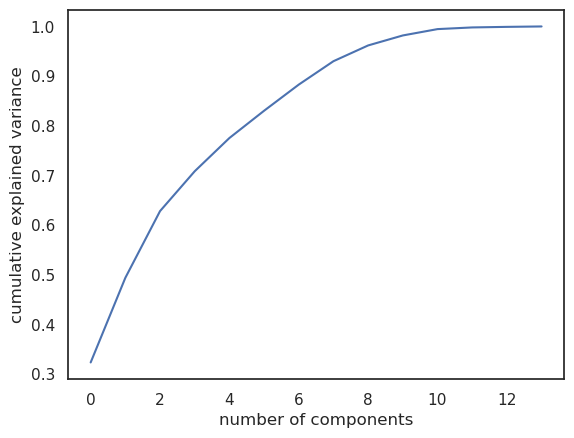

In [50]:
#Determing how many components should be used.
from sklearn.decomposition import PCA
pca = PCA().fit(exoplanets)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.axvline(x=3,color='red', linestyle='--' )
#plt.axhline(y=0.75,color='red', linestyle='--' )


# We need atleast 7 componets saves almost 90% pf the data 

In [51]:
pca = PCA(3)  
projected = pca.fit(exoplanets)


In [52]:
print(pca.components_)

[[-0.05295126 -0.20291675  0.17550277  0.17684402  0.28206974  0.07319362
   0.21093202  0.40972357  0.42316952  0.42891815  0.15752764 -0.41036171
   0.20093951  0.00528805]
 [-0.10818886  0.06489302  0.56131041  0.57280845  0.25361011  0.33535078
  -0.22747862 -0.17856752 -0.09840694 -0.18807955 -0.07787076  0.01454195
  -0.13025725 -0.11042613]
 [-0.03987252 -0.37430395  0.02412373  0.0086931   0.10672908  0.04171616
  -0.20563504 -0.17039706 -0.11584309 -0.13849305  0.3324527   0.0999701
   0.44713239  0.64819041]]


In [53]:
# Transform the data to the principal components
exoplanets_transformed = pca.transform(exoplanets)
np.shape(exoplanets_transformed )

(159, 3)

In [54]:
import plotly.graph_objs as go

# Create a Plotly 3D scatter plot
trace1 = go.Scatter3d(
    x=exoplanets_transformed[:, 0],
    y=exoplanets_transformed[:, 1],
    z=exoplanets_transformed[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=exoplanets_transformed[:, 2],
        colorscale='Viridis',
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

# This code first loads and preprocesses the exoplanet data as before. 
# Then, it performs PCA with 3 principal components


In [55]:
exoplanets_transformed 

array([[ 6.04323588e+00,  8.18898635e+00,  3.93648485e-01],
       [ 1.05951662e+00, -6.89981627e-01, -4.99023943e-01],
       [ 1.04188599e+00, -5.27746486e-01, -4.44648942e-01],
       [ 1.10708946e+00, -2.29480707e-01, -4.12719989e-01],
       [-3.60359163e+00,  4.50227308e-01,  1.95633153e+00],
       [-3.28816592e+00,  7.56335934e-01,  1.52346956e-01],
       [-3.35106998e+00,  1.38324353e-02,  8.55489406e-01],
       [-3.32926743e+00,  9.42043278e-02,  8.60982345e-01],
       [-2.06256480e+00,  7.49094130e-01, -4.20848217e-02],
       [ 4.79288638e+00, -1.33336387e-01,  1.14936865e+00],
       [-2.81869996e-02, -7.03405712e-01,  1.12063801e+00],
       [ 8.29468716e-01, -7.30267777e-01, -6.04392906e-01],
       [ 1.15945520e+00, -7.53304980e-01, -2.84532341e-02],
       [ 4.69175999e-01, -5.78347030e-01,  5.52551904e-01],
       [ 2.80250017e+00, -5.96986999e-01, -1.07757286e+00],
       [ 9.52012292e-02, -4.72182009e-01,  1.01157044e+00],
       [ 7.77391643e-01, -6.67243822e-01

In [56]:
from sklearn.cluster import KMeans

# Assume that you have already reduced the dimensionality of your dataset to 3 using PCA
X_pca = exoplanets_transformed  # your PCA-transformed data
n_clusters = 2 # choose the number of clusters you want to create

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the algorithm to the data
kmeans.fit(X_pca)

# Get the labels assigned by the algorithm to each data point
cluster_labels = kmeans.labels_

# Get the centroids of each cluster
cluster_centers = kmeans.cluster_centers_

/home/sagarika/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with the PCA-transformed data and the cluster labels
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df['Cluster'] = cluster_labels

df


PC1       PC2       PC3  Cluster
0    6.043236  8.188986  0.393648        1
1    1.059517 -0.689982 -0.499024        1
2    1.041886 -0.527746 -0.444649        1
3    1.107089 -0.229481 -0.412720        1
4   -3.603592  0.450227  1.956332        0
..        ...       ...       ...      ...
154  0.726261 -0.801437 -0.521987        1
155  1.847396 -1.141442  0.084284        1
156  0.028785 -0.412106 -2.017266        0
157  0.137029  0.240111 -2.709467        0
158  0.114388  0.417397 -2.736075        0

[159 rows x 4 columns]

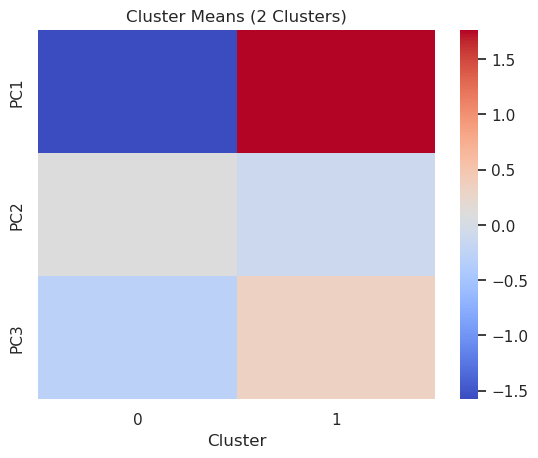

In [58]:
# Compute the mean of each feature for each cluster
cluster_means = df.groupby('Cluster').mean()

# Create a heatmap of the mean values
sns.heatmap(cluster_means.T, cmap='coolwarm')

# Set the axis labels and title
plt.xlabel('Cluster')
plt.title(f'Cluster Means ({n_clusters} Clusters)')

# Display the plot
plt.show()

In [59]:
# Taking more PCA components

In [60]:
pca = PCA(7)  
projected = pca.fit(exoplanets)

In [61]:
# Transform the data to the principal components
exoplanets_transformed = pca.transform(exoplanets)
np.shape(exoplanets_transformed )

(159, 7)

In [62]:
from sklearn.cluster import KMeans

# Assume that you have already reduced the dimensionality of your dataset to 3 using PCA
X_pca = exoplanets_transformed  # your PCA-transformed data
n_clusters = 3 # choose the number of clusters you want to create

# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the algorithm to the data
kmeans.fit(X_pca)

# Get the labels assigned by the algorithm to each data point
cluster_labels = kmeans.labels_

# Get the centroids of each cluster
cluster_centers = kmeans.cluster_centers_

/home/sagarika/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe with the PCA-transformed data and the cluster labels
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7'])
df['Cluster'] = cluster_labels

df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    6.043236  8.188986  0.393648  1.257684  3.914432 -2.273015 -1.872752   
1    1.059517 -0.689982 -0.499024 -1.135057 -0.039822 -0.253048 -0.841808   
2    1.041886 -0.527746 -0.444649 -1.222292 -0.098247 -0.275816 -0.969793   
3    1.107089 -0.229481 -0.412720 -1.247279 -0.394066  0.136458 -0.972050   
4   -3.603592  0.450227  1.956332  0.359477 -0.700082 -0.699242  1.502115   
..        ...       ...       ...       ...       ...       ...       ...   
154  0.726261 -0.801437 -0.521987 -0.508516 -0.630231 -0.922018  0.147124   
155  1.847396 -1.141442  0.084284 -0.569307 -1.255876 -1.049536  0.402220   
156  0.028785 -0.412106 -2.017266 -0.727462 -0.422833 -0.809820  0.223908   
157  0.137029  0.240111 -2.709467 -0.810292  0.725529 -0.041352 -0.875299   
158  0.114388  0.417397 -2.736075 -0.811436  0.601879  0.059442 -1.015634   

     Cluster  
0          2  
1          1  
2          1  
3          1  
4          0  
..       ...  
154        1  
155        1  
156        0  
157        0  
158        0  

[159 rows x 8 columns]

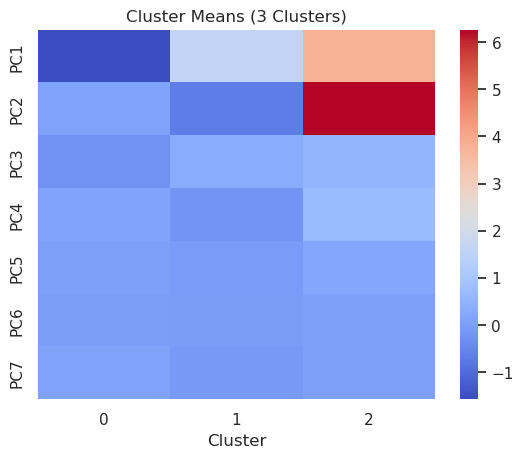

In [64]:
# Compute the mean of each feature for each cluster
cluster_means = df.groupby('Cluster').mean()

# Create a heatmap of the mean values
sns.heatmap(cluster_means.T, cmap='coolwarm')

# Set the axis labels and title
plt.xlabel('Cluster')
plt.title(f'Cluster Means ({n_clusters} Clusters)')

# Display the plot
plt.show()